# 14과 파일다루기

## 1. 파일 경로

* 홈 디렉토리
    * 사용자마다 파일을 저장하고 읽는 기본 경로를 ‘홈 디렉토리‘ 라고 합니다.
    * pathlib 패키지의 Path 함수를 불러 옵시다.
    * Path.home() 함수가 현재 홈 디렉토리 정보를 보여줍니다.
    * 아래 결과는 개인 PC 환경에 따라 조금씩 다를 수 있습니다.

In [18]:
from pathlib import Path

print(Path.home())

C:\Users\User


In [20]:
import sys
print(sys.path[0])

C:\Users\User\P1


## 2. 파일 다루기

### 1) 새 파일 만들기

* 함수 open( 파일이름,  옵션) 
    * 아래와 같이 새 파일이름과 옵션 ‘w’ 를 지정하면 새 파일이 홈 디렉토리에 만들어 집니다.

In [2]:
f = open("newfile.txt", 'w')

open함수로 파일오브젝트 f 를 만들었습니다.

옵션의 의미는 아래와 같습니다.
* w : 파일 생성 및 쓰기 모드
* r : 읽기 모드 
* a : 추가 모드

### 2) 파일 쓰기

* 파일오브젝트.write()로 씁니다.

In [3]:
f.write('파일 쓰기 연습입니다.')

12

* 홈 디렉토리로 가서 직접 파일을 열어봅시다.  
아직 파일 내용이 안보입니다.  닫고, 아래 .close() 구문을 실행한 후에 다시 열어봅시다.


In [4]:
f.close()

* 파일오브젝트를 open하고 다시 써 봅시다.  
파일을 ‘w’로 오픈하고 쓰면, 기존 내용을 덮어 씌웁니다.

In [6]:
f = open("newfile.txt", 'w')
f.write('다시 써 봅시다.')
f.close()

* 기존 내용에 추가하려면, ‘a’ 옵션을 사용합니다.

In [7]:
f = open("newfile.txt", 'a')
f.write('또 다시 써 봅시다.')
f.close()

* 그런데 우리가 원하는 건, 한 줄 내려가서 써 지는 것입니다.
    * **\n** 기호를 추가하면, 한줄 내려 쓰게 됩니다. 

In [8]:
f = open("newfile.txt", 'a')
f.write('\n줄 바꿔서 다시 써 봅시다.')
f.close()

* 실습 ①

① 새 파일을 만드세요.  
② 아래 내용을 파일에 입력해 봅시다. (입력후에는 파일을 close 하고, 탐색기에서 열어 봅시다.)

    <Sonnet 18>  
    -William Shakespeare-  

③ 아래 내용을 파일에 추가해 봅시다.(입력후에는 파일을 close 하고, 탐색기에서 열어 봅시다.)

    Shall I compare thee to a summer’s day?  
    Thou art more lovely and more temperate:  


In [11]:
f = open("soonet 18.txt", 'w')
f.write('<Soonet 18 - William Shakespeare')
f.close()

In [14]:
f = open("soonet 18.txt", 'a')
f.write('WnShall I compare thee to a summer’s day? WnThou art more lovely and more temperate:)
f.close()

SyntaxError: EOL while scanning string literal (<ipython-input-14-6f8412f0688a>, line 2)

### 3) 파일 읽기

두가지 방법이 있습니다.
> ①.readline() : 한줄, 한줄 읽어오기  
②.readlines() : 각 줄을 리스트로 담아 오기

#### ① .readline() : 한줄, 한줄 읽어 봅시다.
    * .readline()을 실행할 때마다 한줄, 한줄 읽어 옵니다.

![윤동주](http://www.gcilbo.kr/news/photo/201708/3011_3103_5530.jpg)

In [15]:
# poem.txt 파일에는 윤동주의 서시가 담겨 있습니다.
f = open("poem.txt", 'r')

print(f.readline())
print(f.readline())
print(f.readline())
print(f.readline())
print(f.readline())

서시

윤동주



죽는 날까지 하늘을 우러러

한 점 부끄럼이 없기를,



In [ ]:
f.close()

#### ② .readlines()
    * 전체를 읽어 옵니다. 
    * 한줄, 한줄을 하나의 문자열 값으로 취급하며
    * 리스트로 저장됩니다.

In [ ]:
# poem.txt 파일에는 윤동주의 서시가 담겨 있습니다.
f = open("poem.txt", 'r')

print(f.readlines())
f.close()

* for loop 를 이용해서 한줄 씩 읽고 어떤 처리를 할 때 유용합니다.

In [ ]:
f = open("poem.txt", 'r')
lines = f.readlines()
for s in lines :
    print(s)

f.close()

* readlines() 로 읽으면 한줄씩 리스트에 담기므로...
    * len()을 이용하면 총 줄 수를 얻어 올 수 있습니다.

In [ ]:
f = open("poem.txt", 'r')
lines = f.readlines()
print(len(lines))

* 실습②

위에서 만든 파일(newfile.txt)의 내용을 .readlines() 이용하여 한줄씩 읽어 봅시다.

In [16]:
f = open("newfile.txt", 'r')

print(f.readline())
print(f.readline())

다시 써 봅시다.또 다시 써 봅시다.

줄 바꿔서 다시 써 봅시다.


### 4) 추가 : 텍스트를 읽어서 워드클라우드 만들기.



마틴루터킹 목사의 'I have a Dream' 연설문을 가지고 워드 클라우드를 한번 만들어 보겠습니다.

![이미지](https://cdn.jornaldebrasilia.com.br/wp-content/uploads/2020/06/martin-luther-king-1000x600.png)

#### 워드 클라우드를 만드는 순서

##### 1) 텍스트파일로 저장하기
    ① 읽을 파일을 만듭니다.
    ② 여기서는 수동으로 어디선가 가져오겠지만,
    ③ 나중에는 크롤링을 통해서 웹에서 가져올 수도 있습니다.
    
    
##### 2) 텍스트 전처리
    ① 파일을 읽어서 단어 단위로 쪼갭니다. .split()
    ② 단어별 빈도수를 계산하여 저장합니다.(여기서는 딕셔너리에 저장)
    ③ 조사들은 제거합니다.
    
##### 3) 워드클라우드 그리기
    ① 라이브러리를 불러옵니다.(아나콘다에는 기본설치되어 있지 않으므로 설치해야 합니다.)
    ② 워드클라우드를 그립니다.

1) 텍스트파일로 저장하기  
여기서는 이미 저장해 놓았습니다.

2) 텍스트 전처리

In [22]:
# ① 파일을 읽어서 단어 단위로 쪼갭니다.
# 먼저 텍스트 파일을 읽고.
file = open('dream.txt', "r", encoding='UTF8')
text = file.read() 
file.close()

# 텍스트들을 단어 단위로 잘라 리스트에 담습니다.
wordList = text.split()  

In [23]:
wordList

['I',
 'am',
 'happy',
 'to',
 'join',
 'with',
 'you',
 'today',
 'in',
 'what',
 'will',
 'go',
 'down',
 'in',
 'history',
 'as',
 'the',
 'greatest',
 'demonstration',
 'for',
 'freedom',
 'in',
 'the',
 'history',
 'of',
 'our',
 'nation.',
 '[Applause]',
 'Five',
 'score',
 'years',
 'ago,',
 'a',
 'great',
 'American,',
 'in',
 'whose',
 'symbolic',
 'shadow',
 'we',
 'stand',
 'signed',
 'the',
 'Emancipation',
 'Proclamation.',
 'This',
 'momentous',
 'decree',
 'came',
 'as',
 'a',
 'great',
 'beacon',
 'light',
 'of',
 'hope',
 'to',
 'millions',
 'of',
 'Negro',
 'slaves',
 'who',
 'had',
 'been',
 'seared',
 'in',
 'the',
 'flames',
 'of',
 'withering',
 'injustice.',
 'It',
 'came',
 'as',
 'a',
 'joyous',
 'daybreak',
 'to',
 'end',
 'the',
 'long',
 'night',
 'of',
 'captivity.',
 'But',
 'one',
 'hundred',
 'years',
 'later,',
 'we',
 'must',
 'face',
 'the',
 'tragic',
 'fact',
 'that',
 'the',
 'Negro',
 'is',
 'still',
 'not',
 'free.',
 'One',
 'hundred',
 'years',

In [28]:
# ② 단어별 빈도수를 계산하여 저장합니다.(여기서는 딕셔너리에 저장)

# Unique word 저장 : set으로 변환하는 이유는 중복된 값을 없애주기 때문.
worduniq = set(wordList)

# 단어와 빈도수를 담을 빈 딕셔너리 공간.
wordCount = {}

# 단어별로 갯수를 count 해서 딕셔너리에 저장.
for w in worduniq:
    wordCount[w] = wordList.count(w)

# 조사들은 제외합시다. 
del_word = ['the','a','is','of','on','that','this','and','be','to','have','will']
for w in del_word :
    if w in wordCount :
        del wordCount[w]

In [25]:
wordCount

{'pledge': 1,
 'join': 3,
 'cooling': 1,
 'injustice': 2,
 'here': 3,
 'signed': 1,
 'community': 1,
 'transform': 1,
 'rough': 1,
 'these': 1,
 'rights.': 1,
 'end,': 1,
 'drinking': 1,
 'snowcapped': 1,
 'promise': 1,
 'red': 1,
 'heights': 1,
 'slaves': 2,
 'come': 9,
 'it': 2,
 'With': 3,
 'honoring': 1,
 'security': 1,
 'jangling': 1,
 'obligation,': 1,
 'was': 2,
 'also': 1,
 'Mississippi': 1,
 'signing': 1,
 'those': 1,
 'withering': 1,
 'highways': 1,
 'one': 8,
 'gradualism.': 1,
 'dream.': 2,
 'now.': 1,
 'creative': 2,
 'give': 1,
 'shake': 1,
 'fresh': 1,
 'say': 2,
 'glory': 1,
 'Gentiles,': 1,
 'So': 3,
 'out': 3,
 'oasis': 1,
 'brutality.': 1,
 'men': 3,
 'one.': 1,
 'usual.': 1,
 'left': 1,
 'valley': 3,
 'society': 1,
 'Georgia': 1,
 'day.': 1,
 'demonstration': 1,
 'gain': 1,
 'exalted,': 1,
 'tragic': 1,
 'given': 1,
 'himself': 1,
 '“We': 1,
 'there': 3,
 'And': 2,
 'rooted': 1,
 'asking': 1,
 'staggered': 1,
 'they': 2,
 'freedom.': 1,
 'nothing': 1,
 'transformed'

3) 워드클라우드 그리기

In [26]:
# 패키지를 설치합니다.
# 패키지 설치는 노트북에 한번만 하면 됩니다.
!pip install wordcloud

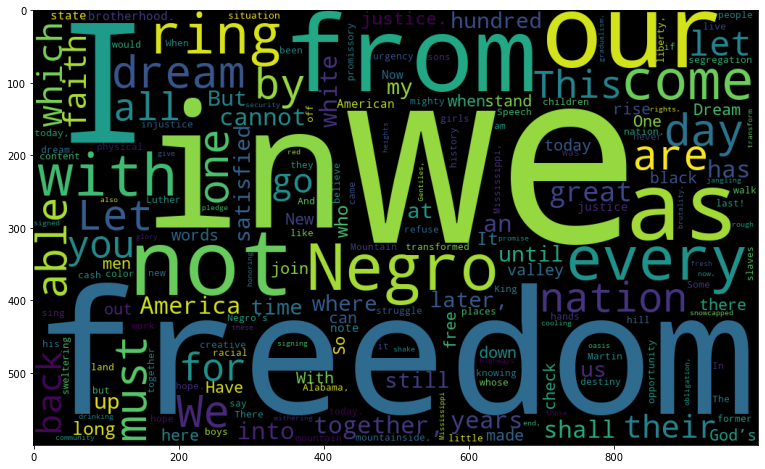

In [29]:
# ②워드클라우드를 그립니다.
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# word cloud 그리기
wordcloud = WordCloud(width = 1000, height = 600).generate_from_frequencies(wordCount)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()

* 간단 실습
    * 불필요한 조사나 단어를 좀 더 제외해 봅시다.
    * 그리고 다시 그려봅시다.

----

## 실습 답안

* 실습 ①

① 새 파일을 만드세요.  
② 아래 내용을 파일에 입력해 봅시다.

<Sonnet 18>  
-William Shakespeare-  
  
Shall I compare thee to a summer’s day?  
Thou art more lovely and more temperate:  

③ 입력 후에는 반드시 .close()로 닫아야 파일에 기록됩니다.


In [ ]:
f = open("newfile2.txt", 'w')

f.write("<Sonnet 18>")
f.write("\n-William Shakespeare")
f.write("\n")
f.write("\nShall I compare thee to a summer's day?")
f.write("\nThou art more lovely and more temperate:")

f.close()

* 실습②

위에서 만든 파일의 내용을 .readlines() 이용하여 한줄씩 읽어 봅시다.

In [ ]:
f = open("newfile2.txt", 'r')
lines = f.readlines()

for s in lines :
    print(s)

f.close()